In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape


(100, 4)

In [ ]:
#this falls under the prepreocessing. we selected all the rows and and every column except the first column
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


These are the steps we are going to perform here :

1.   Preprocess + EDA + Feature Selection
2.   Extract input and output cols
3.   Scale the values
4.   Train test split
5.   Train the model
6.   Evaluate the model \ Model Selection
7.   Deploy the model








In [ ]:
#we will be doing EDA here, EDA basically stands for Exploratory Data Analysis which is a method of summarizing and understanding the main characteristics of a dataset using statistical summaries and visualizations.
# for that , we will be using a librabry here
import matplotlib.pyplot as plt


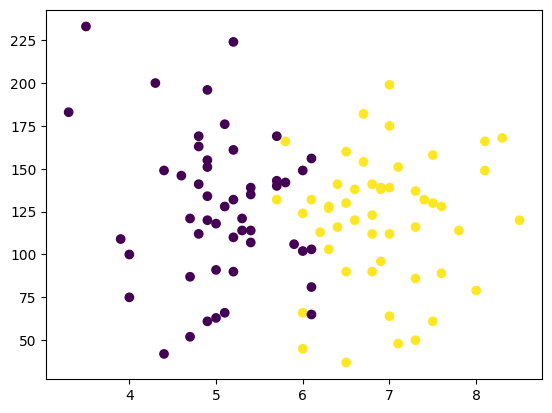

In [ ]:
#here cgpa and iq are the axis and the c represents color of the students who have got the placements.
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
#now the next part is to make a model i.e a machine learning model so that it can learn the pattern hidden in the above data.
# here we are going to use linear regression for it.
#linear regression will basically work on these types of data where a line can divide the data and decide the pattern.

# lets move to next part i.e
#Extract Output and input cols
#here divide the cols 'cgpa' and 'iq' as independent variables and 'placement' as dependent variable


In [ ]:
X = df.iloc[:,1:3]  # means all rows and third and second column only.
Y = df.iloc[:,-1]   # means all rows and last column only.

In [ ]:
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
#Now we do Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1) # here X is independend vars whereas Y is dependent vars.

X_train


,cgpa,iq
8,6.1,156.0
12,5.4,139.0
82,6.5,37.0
78,6.1,81.0
93,6.8,112.0
...,...,...
29,7.0,112.0
54,6.4,141.0
49,5.4,135.0
43,6.8,141.0


In [ ]:
#Now we will move to the next step i.e Scalling .
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # transforms the value into the range of -1 to +1
X_train

array([[ 0.19392715,  0.81853102],
       [-0.4390993 ,  0.38757697],
       [ 0.55565655, -2.1981473 ],
       [ 0.19392715, -1.08273683],
       [ 0.82695361, -0.29687945],
       [ 0.55565655,  0.91993197],
       [-1.34342281, -2.07139611],
       [ 0.19392715,  0.21012531],
       [-0.89126106,  0.69177983],
       [-1.34342281,  0.64107935],
       [-2.15731396,  2.77049934],
       [-0.619964  ,  0.94528221],
       [ 0.1034948 , -0.55038183],
       [ 1.27911536, -1.86859421],
       [-0.619964  , -0.34757993],
       [ 0.55565655,  0.15942483],
       [ 1.73127711, -0.24617898],
       [ 1.09825066, -1.91929469],
       [ 0.91738596, -0.70248326],
       [-1.70515221, -1.23483826],
       [ 2.00257416,  0.64107935],
       [ 0.01306245, -0.44898088],
       [ 0.1034948 ,  0.64107935],
       [-1.79558456, -0.37293017],
       [-0.98169341, -0.29687945],
       [ 0.37479185, -0.5250316 ],
       [-1.16255811,  0.56502864],
       [-0.71039635,  1.32553578],
       [-1.07212576,

In [ ]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.6460889 ,  0.36222673],
       [-1.07212576, -0.9306354 ],
       [ 1.45998006,  0.86923149],
       [ 1.09825066,  0.69177983],
       [ 1.36954771,  0.21012531],
       [ 1.00781831, -1.51369088],
       [ 1.91214181, -1.13343731],
       [ 0.19392715, -1.48834064],
       [ 2.18343887,  1.12273387],
       [ 0.73652126,  1.47763721]])

In [ ]:
# Next thing is train the model
# use linear aggression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [ ]:
#model_training
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
# Model Evaluation
y_pred = clf.predict(X_test)

In [ ]:
Y_test

,placement
48,1
23,0
91,1
21,1
3,1
64,1
58,1
56,0
53,1
97,1


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(Y_test,y_pred)

0.9

In [ ]:
# to see the decision boundary pattern , do these steps
from mlxtend.plotting import plot_decision_regions

<Axes: >

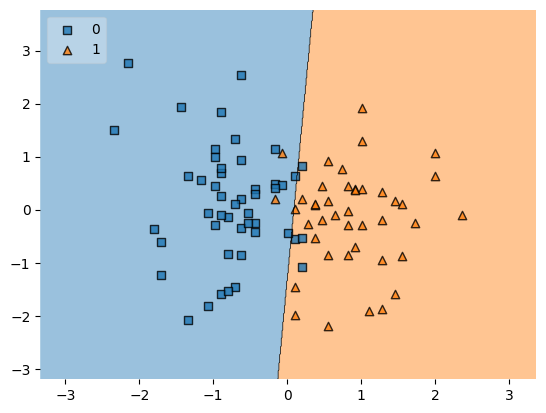

In [ ]:
# here clf - classifier , here X_train is already a numpy array as we used Scaler on it. But Y_train is not so we used .values to convert it into the numpy arrays.
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [ ]:
import pickle
#this is used to convert any object of python to a file. the files can be used in other environments as per our need.


In [ ]:
pickle.dump(clf,open('model.pkl','wb'))
# Congrats model.pkl is your machine learning model.